<a href="https://colab.research.google.com/github/dylanscoggins/CSCE4205Project/blob/dylan/Group0Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Imports

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import pandas as pd
import numpy as np
import pathlib
import os
import re

# Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Helper Functions

In [3]:
# credit to https://www.kaggle.com/reddieeddie
def get_row(df, col, name):
  return df[df[col]==name]

# Data Sets

In [10]:
# download .csv data sets from GitHub repository
# link to repo: https://github.com/dylanscoggins/CSCE4205Project
pokemonDataSet01 = 'https://raw.githubusercontent.com/dylanscoggins/CSCE4205Project/main/PokemonDataSet01.csv'
ds1 = pd.read_csv(pokemonDataSet01)

pokemonDataSet02 = 'https://raw.githubusercontent.com/dylanscoggins/CSCE4205Project/main/PokemonDataSet02.csv'
ds2 = pd.read_csv(pokemonDataSet02)

# associate images with pokemon in ds2
# credit to https://www.kaggle.com/reddieeddie for the framework to set up Pokédex
pokedex = '/content/gdrive/MyDrive/CSCE 4205/Project Data/Images/'
fileNames = os.listdir(pokedex)
pokeNames, pokeTypes = [], []
for path in os.listdir(pokedex):
  name = re.search(r"^([^.]*).*", path).group(1)
  pokeNames.append(name.capitalize())
  pokeTypes.append(ds2['Type1'][int(get_row(ds2, 'Name', name).index.values)])

numImgs = len(fileNames)
# print("Number of pokemon: ", numImgs)
print("Pokédex contains", numImgs, "Pokémon")

col1 = fileNames
col2 = pokeNames
col3 = pokeTypes

pokemonData = pd.DataFrame({'Image':col1, 'Pokémon':col2, 'Primary Type':col3})
pokemonData.sort_values(by=['Primary Type'])

Pokédex contains 809 Pokémon


,Image,Pokémon,Primary Type
153,cutiefly.jpg,Cutiefly,Bug
661,shuckle.png,Shuckle,Bug
727,yanma.png,Yanma,Bug
292,illumise.png,Illumise,Bug
408,ledyba.png,Ledyba,Bug
...,...,...,...
613,samurott.png,Samurott,Water
618,slowking.png,Slowking,Water
367,magikarp.png,Magikarp,Water
600,poliwhirl.png,Poliwhirl,Water


In [18]:
len(pokemonData['Primary Type'].unique())

18

In [ ]:
# fig = plt.figure(16, figsize=(10,10))
# images = []
# for i in range(25):
#   img = mpimg.imread(pokedex + pokemonData['Image'][i])
#   images.append(img)
#   if 0 <= i <= 24:
#     name = pokemonData['Pokémon'][i]
#     pokemonType = pokemonData['Primary Type'][i]
#     fig.add_subplot(2, 8, i+1).set_title(name+": "+pokemonType, size=15)
#     fig.add_subplot(2, 25, i+1)
#     plt.imshow(img)
#     plt.axis("off")
# plt.show()
# plt.tight_layout()

In [105]:
imgs = []
names = []
for i in range(len(pokeNames)):
  img = mpimg.imread(pokedex + pokemonData['Image'][i])
  imgs.append(img)

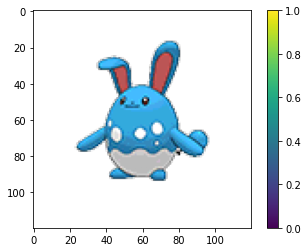

In [82]:
plt.figure()
plt.imshow(imgs[0])
plt.colorbar()
plt.grid(False)
plt.show()

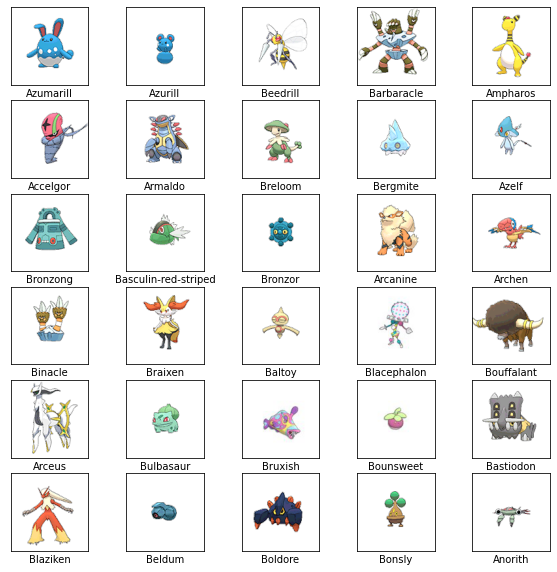

In [106]:
plt.figure(figsize=(10,10))
for i in range(30):
  plt.subplot(6,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imgs[i], cmap=plt.cm.binary)
  plt.xlabel(pokeNames[i])
plt.show()